In [13]:
import sys
sys.path.insert(1, sys.path[0].replace('tests', 'src'))
from k_nearest_neighbors import KNearestNeighborsClassifier
import pandas as pd

In [14]:
data = [['Shortbread',     0.14,       0.14,      0.28,     0.44],
        ['Shortbread',     0.10,       0.18,      0.28,     0.44],
        ['Shortbread',     0.12,       0.10,      0.33,     0.45],
        ['Shortbread',     0.10,       0.25,      0.25,     0.40],
        ['Sugar',     0.00,       0.10,      0.40,     0.50],
        ['Sugar',     0.00,       0.20,      0.40,     0.40],
        ['Sugar',     0.02,       0.08,      0.45,     0.45],
        ['Sugar',     0.10,       0.15,      0.35,     0.40],
        ['Sugar',     0.10,       0.08,      0.35,     0.47],
        ['Sugar',     0.00,       0.05,      0.30,     0.65],
        ['Fortune',     0.20,       0.00,      0.40,     0.40],
        ['Fortune',     0.25,       0.10,      0.30,     0.35],
        ['Fortune',     0.22,       0.15,      0.50,     0.13],
        ['Fortune',     0.15,       0.20,      0.35,     0.30],
        ['Fortune',     0.22,       0.00,      0.40,     0.38],
        ['Shortbread',     0.05,       0.12,      0.28,     0.55],
        ['Shortbread',     0.14,       0.27,      0.31,     0.28],
        ['Shortbread',     0.15,       0.23,      0.30,     0.32],
        ['Shortbread',     0.20,       0.10,      0.30,     0.40]]

In [15]:
k_dict = {}
for num_k in range(1, 19):
    k_dict[num_k] = 0
    knearest = KNearestNeighborsClassifier(num_k)
    for i in range(len(data)):
        current_point = data[i]
        data.pop(i)
        knearest.fit([row[1:] for row in data], [row[0] for row in data])
        classification = knearest.classify(current_point[1:])
        if classification == current_point[0]:
            k_dict[num_k] += 1
        data.insert(i, current_point)

<AxesSubplot:xlabel='k', ylabel='accuracy'>

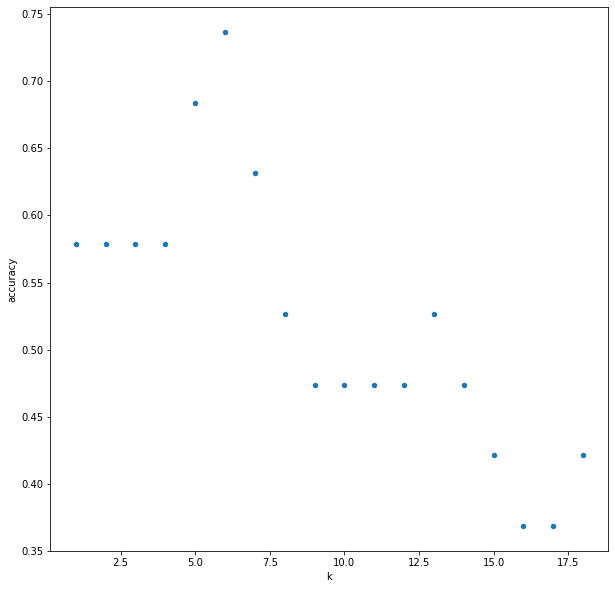

In [22]:
k_values = range(1, 19)
accuracy = [k_dict[k] / 19 for k in k_values]
k_df = pd.DataFrame({'k': k_values, 'accuracy': accuracy})
k_df.plot(x='k', y='accuracy', figsize=(10, 10), kind="scatter")